In [48]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from preamble import *
plt.rcParams['image.cmap'] = "gray"
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

# Default 조건

Text(0, 0.5, '특성 1')

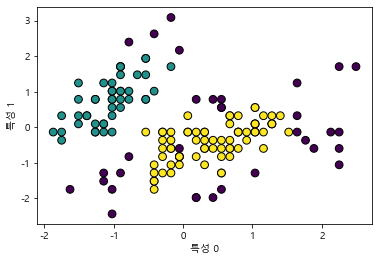

In [28]:
X=iris.data
y=iris.target
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# eps를 0.7로 변경 --> 클러스터를 1개로 만듦.
dbscan = DBSCAN() # 기본값 -> 0.5 
# shift + tab -> 함수 속성 보여줌.
clusters = dbscan.fit_predict(X_scaled)
# 클러스터 할당을 표시합니다
plt.scatter(X_scaled[:, 0], 
            X_scaled[:, 1], 
            c=clusters, 
            cmap='viridis', 
            s=60, 
            edgecolors='black')

plt.xlabel("특성 0")
plt.ylabel("특성 1")

# 노이즈
## default 조건시

In [33]:
print('default 조건시 노이즈 : ',len(list(filter(lambda x:x==-1,clusters))))

default 조건시 노이즈 :  34


# eps=0.8, min_samples=8 조건

Text(0, 0.5, '특성 1')

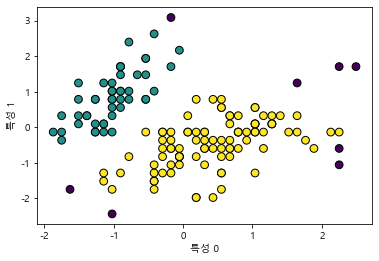

In [34]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# eps를 0.7로 변경 --> 클러스터를 1개로 만듦.
dbscan = DBSCAN(eps=0.8, min_samples=8) # 기본값 -> 0.5 
# shift + tab -> 함수 속성 보여줌.
clusters = dbscan.fit_predict(X_scaled)
# 클러스터 할당을 표시합니다
plt.scatter(X_scaled[:, 0], 
            X_scaled[:, 1], 
            c=clusters, 
            cmap='viridis', 
            s=60, 
            edgecolors='black')

plt.xlabel("특성 0")
plt.ylabel("특성 1")

# 노이즈
## eps=0.8, min_samples=8 조건시

In [36]:
print('default 조건시 노이즈 : ',len(list(filter(lambda x:x==-1,clusters))))

default 조건시 노이즈 :  8


# eps 크기별 노이즈 확인 및 산포도

eps=0.1 조건시 노이즈 : 150
eps=0.2 조건시 노이즈 : 150
eps=0.3 조건시 노이즈 : 131
eps=0.4 조건시 노이즈 : 117
eps=0.5 조건시 노이즈 : 59
eps=0.6 조건시 노이즈 : 32
eps=0.7 조건시 노이즈 : 17
eps=0.8 조건시 노이즈 : 8
eps=0.9 조건시 노이즈 : 7
eps=1.0 조건시 노이즈 : 3


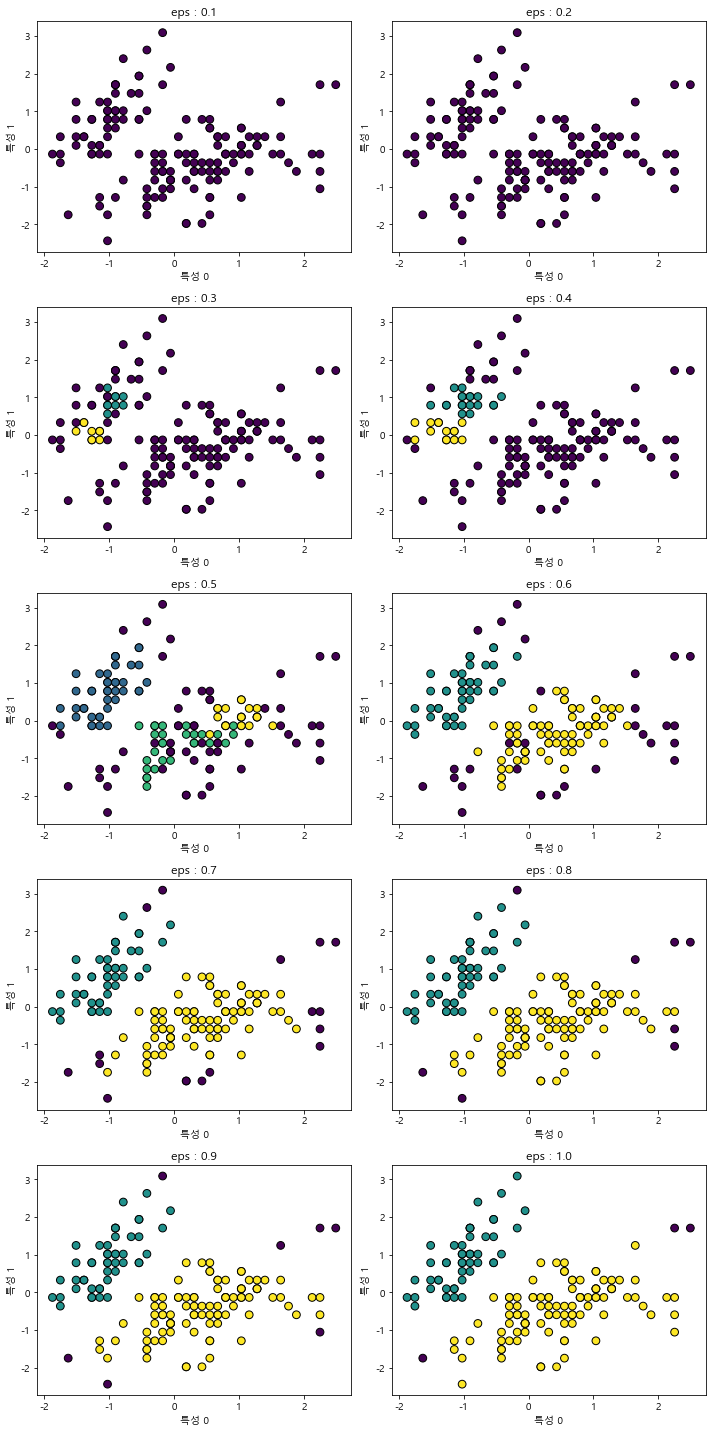

In [56]:
import matplotlib.pyplot as plt
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(5, 2, figsize=(10, 20))
ax = axes.ravel()

eps_list=[i for i in range(1,11)]
for i in range(10):
    dbscan = DBSCAN(eps=eps_list[i]/10, min_samples=8) # 기본값 -> 0.5 
    clusters = dbscan.fit_predict(X_scaled)
    ax[i].scatter(X_scaled[:, 0], 
                  X_scaled[:, 1], 
                  c=clusters, 
                  cmap='viridis', 
                  s=60, 
                  edgecolors='black')
    ax[i].set_title(f'eps : {eps_list[i]/10}')
    ax[i].set_xlabel("특성 0")
    ax[i].set_ylabel("특성 1")
    print('eps={0} 조건시 노이즈 : {1}'.format((i+1)/10,len(list(filter(lambda x:x==-1,clusters)))))
fig.tight_layout()    